In [1]:
from nufeb_tools import utils,plot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks

In [2]:
low = utils.get_data(directory= r'D:\runs\Run_50_50_10_1_2021-07-27')
med = utils.get_data(directory= r'D:\runs\Run_50_50_45_1_2021-07-27')
high = utils.get_data(directory= r'D:\runs\Run_50_50_100_1_2021-07-27')

In [20]:
runs = [r'D:\runs\Run_50_50_100_1_2021-08-04_879890',
        r'D:\runs\Run_50_50_100_1_2021-08-04_749751',
        r'D:\runs\Run_50_50_100_1_2021-08-04_738274',
        r'D:\runs\Run_50_50_100_1_2021-08-04_594614',
        r'D:\runs\Run_50_50_100_1_2021-08-04_584010',
        r'D:\runs\Run_50_50_100_1_2021-08-04_548827',
        r'D:\runs\Run_50_50_100_1_2021-08-04_462847',
        r'D:\runs\Run_50_50_100_1_2021-08-04_369407',
        r'D:\runs\Run_50_50_100_1_2021-08-04_262947',
        r'D:\runs\Run_50_50_100_1_2021-08-04_174205'
        ]
data = list()
for run in runs:
    data.append(utils.get_data(directory= run))
mus = list()
mmu = list()
for d in data:
    mus.append(d.metadata['ecw']['GrowthRate'])
    mmu.append(d.metadata['ecw']['GrowthRate']/d.metadata['cyano']['GrowthRate'])
d2 = [x for _, x in sorted(zip(mus, data))]
mu2 = sorted(mus)
dmu = sorted(mmu)
Ratio2 = [x.biomass.iloc[-1,2]/x.biomass.iloc[-1,1] for x in d2]

In [3]:
Ratio = [x.biomass.iloc[-1,2]/x.biomass.iloc[-1,1] for x in [low,med,high]]
labels = ['low','med','high']
colors = ['#fee6ce','#fdae6b','#e6550d']
cons = [low,med,high]
ss_time = list()
suc_max = list()
suc_end = list()
for con in cons:
    difference = np.diff(con.avg_con['Sucrose'].values,prepend=0)
    ss_time.append(con.avg_con.index[np.argmin(difference)])
    suc_max.append(con.avg_con['Sucrose'].max())
    suc_end.append(con.avg_con['Sucrose'].iloc[-10:].mean())

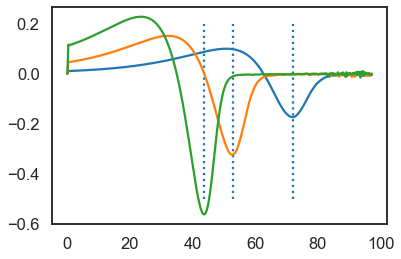

In [5]:
cons = [low,med,high]
ss_time = list()
suc_max = list()
suc_end = list()
f,ax = plt.subplots()
for con in cons:
    difference = np.diff(con.avg_con['Sucrose'].values,prepend=0)#np.diff(con.avg_con['Sucrose'],prepend=0,n=20)
    #pks,_ = find_peaks(difference,distance=50,height=.005)
    #idx = [con.avg_con.index[x] for x in pks]
    ax.plot(con.avg_con.index,difference)
    ax.vlines(con.avg_con.index[np.argmin(difference)],-0.5,0.2,ls=':')
    ss_time.append(con.avg_con.index[np.argmin(difference)])
    suc_max.append(con.avg_con['Sucrose'].max())
    suc_end.append(con.avg_con['Sucrose'].iloc[-10:].mean())
    #ax.scatter(idx,difference[pks])
#plot.average_nutrients(low.avg_con,'Sucrose',color='#fee6ce',ax=ax)

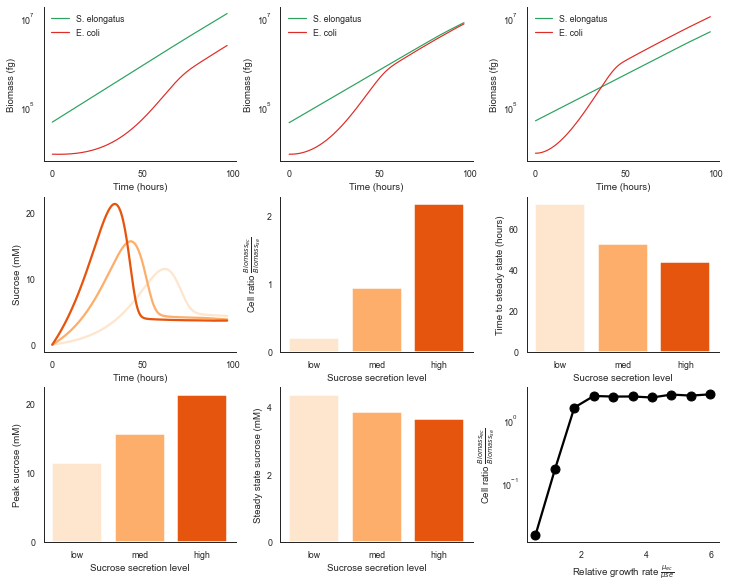

In [22]:
fig = plt.figure(constrained_layout=True, figsize=(10,8))
gs0 = gridspec.GridSpec(3, 3, figure=fig)
sns.set_context('paper')
sns.set_style('white')

ax1 = fig.add_subplot(gs0[0, 0])
ax2 = fig.add_subplot(gs0[0, 1],sharey=ax1,sharex=ax1)
ax3 = fig.add_subplot(gs0[0, 2],sharey=ax1,sharex=ax1)
ax4 = fig.add_subplot(gs0[1,0],sharex=ax1)
ax5 = fig.add_subplot(gs0[1,1])
ax6 = fig.add_subplot(gs0[1,2])
ax7 = fig.add_subplot(gs0[2,0])
ax8 = fig.add_subplot(gs0[2,1])
ax9 = fig.add_subplot(gs0[2,2])
plot.overall_growth(low.biomass,ax=ax1)
plot.overall_growth(med.biomass,ax=ax2)
plot.overall_growth(high.biomass,ax=ax3)

#ax4.set_yscale('log')
plot.average_nutrients(low.avg_con,'Sucrose',color='#fee6ce',ax=ax4)
plot.average_nutrients(med.avg_con,'Sucrose',color='#fdae6b',ax=ax4)
plot.average_nutrients(high.avg_con,'Sucrose',color='#e6550d',ax=ax4)

ax5.bar(labels,Ratio,color=colors)
ax5.set_xlabel('Sucrose secretion level')
ax5.set_ylabel(r'Cell ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
ax6.bar(labels,ss_time,color=colors)
ax6.set_xlabel('Sucrose secretion level')
ax6.set_ylabel('Time to steady state (hours)')
ax7.bar(labels,suc_max,color=colors)
ax7.set_xlabel('Sucrose secretion level')
ax7.set_ylabel('Peak sucrose (mM)')
ax8.bar(labels,suc_end,color=colors)
ax8.set_xlabel('Sucrose secretion level')
ax8.set_ylabel('Steady state sucrose (mM)')
ax9.plot(dmu,Ratio2,marker='o',color='k')

ax9.set(yscale="log")
ax9.set_xlabel(r'Relative growth rate $\frac{\mu_{ec}}{\mu{se}}$')
ax9.set_ylabel(r'Cell ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')

ax4.set_ylabel('Sucrose (mM)')
sns.despine()
fig.savefig('Whole culture analysis.png',dpi=600)